# Part III (15 points) Build neural network pipeline for your final project. Report your progress on the final project

In this part, you need to include the neural network method into your final project, and report the latest progress for the final project. 

Note: You do not need to perform parameter tuning on neural network in this assignment. But you should at least train one neural network model on your final project dataset.

### TASK 1: Face detection/Localization

Here we use OpenCV library to implement Haar Cascade[link text](https://)

In [ ]:
import cv2
import matplotlib.pyplot as plt


classifier_xml = '/content/drive/MyDrive/Data/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(classifier_xml)



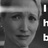

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow


images = train_data.sample(3)
# image_path =  "/content/drive/MyDrive/Data/handsome_man.jpg"

facial_exp_pixels = np.array(images.iloc[0]['pixels'].split()).astype('float32') # select one image sample
facial_exp = facial_exp_pixels.reshape(48, 48)
# facial_exp = facial_exp.reshape(96, 96)

# img = cv2.imread(image_path)
img = cv2.imwrite('exp.jpg',facial_exp)
imm = cv2.imread('exp.jpg',1)
cv2_imshow(imm)

# face = face_cascade.detectMultiScale(img, 1.1, 4)
gray = cv2.cvtColor(imm, cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(gray, 1.1, 4)

# type(facial_exp)

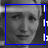

-1

In [ ]:
for (x,y,w,h) in face:
  cv2.rectangle(imm, (x,y), (x+w,y+h), (255,0,0), 1)

cv2_imshow(imm)
cv2.waitKey()

### TASK 2: Feature Extraction/Gabor Filters

Here we use OpenCV library to implement Haar Cascade[link text](https://)

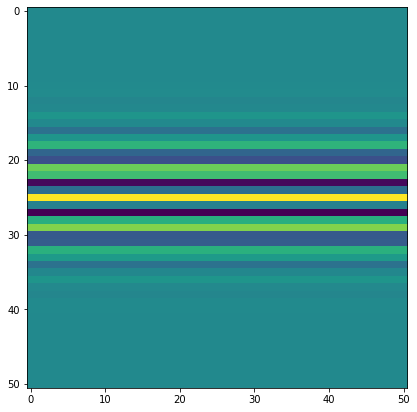

In [ ]:
#Use Gabor Filters
ksize = 50
sigma = 5
theta = 1*np.pi/2
lamda = 1*np.pi/4
gamma = 0.01
phi = 0.08

kernel = cv2.getGaborKernel((ksize,ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)


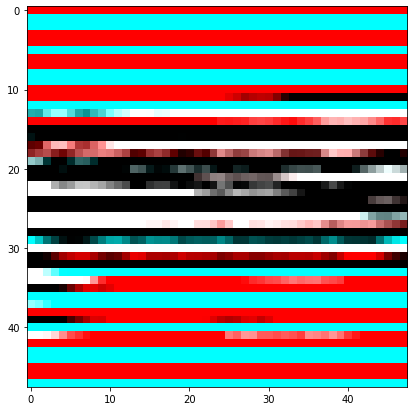

In [ ]:
face_filtered = cv2.filter2D(imm, cv2.CV_8UC3, kernel)
kernel_resized = cv2.resize(kernel, (48, 48))
plt.imshow(kernel_resized)
plt.imshow(face_filtered, cmap='gray')

In [ ]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters



def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        kernel_resized = cv2.resize(kern, (48, 48))
        np.maximum(accum, fimg, accum)
    return accum



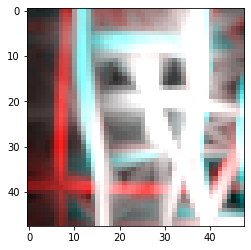

In [ ]:
filters = build_filters()

res1 = process(imm, filters)

plt.imshow(imm)
plt.imshow(res1)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
print(imm.shape, '\n', images.iloc[0].shape)
images.iloc[0]["pixels"]

NameError: ignored

In [ ]:
def build_model():
    model = Sequential()
    # Layer 1
    model.add(Conv2D(32, (3, 3), kernel_initializer=custom_gabor,
                                      input_shape=(nb_channel, img_rows, img_cols)))
    model.add(Activation('relu'))

    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), kernel_initializer=custom_gabor))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    model.add(Conv2D(32, (3, 3), kernel_initializer=custom_gabor))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# The column of the 'pixels' is strings of pixel values.
# splitting the 'pixels' column into 2304 columns (48*48), in which each column represents one-pixel value.

train_data[['Pixel_'+ str(i) for i in range(1,2305)]] = train_data.pixels.str.split(expand=True)
train_data.drop(['pixels', 'Usage'], axis=1, inplace=True)

publictest_data[['Pixel_'+ str(i) for i in range(1,2305)]] = publictest_data.pixels.str.split(expand=True)
publictest_data.drop(['pixels', 'Usage'], axis=1, inplace=True)

privatetest_data[['Pixel_'+ str(i) for i in range(1,2305)]] = privatetest_data.pixels.str.split(expand=True)
privatetest_data.drop(['pixels', 'Usage'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [ ]:
train_data

,emotion_type,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_2295,Pixel_2296,Pixel_2297,Pixel_2298,Pixel_2299,Pixel_2300,Pixel_2301,Pixel_2302,Pixel_2303,Pixel_2304
0,Angry,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,Angry,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,Fear,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,Sad,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,Neutral,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,Fear,84,85,85,85,85,85,85,85,86,...,35,34,35,36,40,27,125,231,215,200
28705,Angry,114,112,113,113,111,111,112,113,115,...,83,94,107,120,141,144,132,129,182,222
28706,Sad,74,81,87,89,95,100,98,93,105,...,211,214,211,209,200,195,192,188,187,187
28707,Angry,222,227,203,90,86,90,84,77,94,...,136,139,141,145,137,139,136,136,136,134


In [ ]:
# Converting features from string to numeric
 
train_L = train_data['emotion_type']
train_data = train_data.loc[:, ~train_data.columns.isin(['emotion_type'])].to_numpy().astype('float32')
train_data = pd.DataFrame(train_data, columns = ['Pixel_'+str(i) for i in range(1,2305)])
train_data = pd.concat([train_L, train_data], axis=1)
del train_L

publictest_data_L = publictest_data['emotion_type']
publictest_data = publictest_data.loc[:, ~publictest_data.columns.isin(['emotion_type'])].to_numpy().astype('float32')
publictest_data = pd.DataFrame(publictest_data, columns = ['Pixel_'+str(i) for i in range(1,2305)])
publictest_data = pd.concat([publictest_data_L, publictest_data], axis=1)
del publictest_data_L

privatetest_data_L = privatetest_data['emotion_type']
privatetest_data = privatetest_data.loc[:, ~privatetest_data.columns.isin(['emotion_type'])].to_numpy().astype('float32')
privatetest_data = pd.DataFrame(privatetest_data, columns = ['Pixel_'+str(i) for i in range(1,2305)])
privatetest_data = pd.concat([privatetest_data_L, privatetest_data], axis=1)
del privatetest_data_L

publictest_data

ValueError: ignored

In [ ]:
# spliting train_data into train and validation datasets
from sklearn.model_selection import train_test_split
train, validation = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
# spliting features and labels in train, validation, publictest, and privatetest

''''# datasets for KNN
y_train_data = train_data['emotion_type']
X_train_data = train_data.drop(['emotion_type'], axis=1)

# datasets for neural network, DNN, and CNN'''
y_train = train['emotion_type']
X_train = train.drop(['emotion_type'], axis=1)

y_val = validation['emotion_type']
X_val = validation.drop(['emotion_type'], axis=1)

y_pbtest = publictest_data['emotion_type']
X_pbtest = publictest_data.drop(['emotion_type'], axis=1)

y_pvtest = privatetest_data['emotion_type']
X_pvtest = privatetest_data.drop(['emotion_type'], axis=1)

In [ ]:
#print('Shape of X_train_data: ', X_train_data.shape)
#print('Shape of y_train_data: ', y_train_data.shape)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_val: ', X_val.shape)
print('Shape of y_val: ', y_val.shape)
print('Shape of X_pbtest: ', X_pbtest.shape)
print('Shape of y_pbtest: ', y_pbtest.shape)
print('Shape of X_pvtest: ', X_pvtest.shape)
print('Shape of y_pvtest: ', y_pvtest.shape)

Shape of X_train:  (22967, 2304)
Shape of y_train:  (22967,)
Shape of X_val:  (5742, 2304)
Shape of y_val:  (5742,)
Shape of X_pbtest:  (3589, 2304)
Shape of y_pbtest:  (3589,)
Shape of X_pvtest:  (3589, 2304)
Shape of y_pvtest:  (3589,)


In [ ]:
# Normalization for neural network, DNN, and CNN

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_pbtest_scaled = scaler.transform(X_pbtest)
X_pvtest_scaled = scaler.transform(X_pvtest)

In [ ]:
# Converting categorical labels to numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)
y_pbtest_le = le.transform(y_pbtest)
y_pvtest_le = le.transform(y_pvtest)

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [ ]:
#converting labels from numerical to dummy

from tensorflow.keras.utils import to_categorical

y_train_c = to_categorical(y_train_le, 7)
y_val_c = to_categorical(y_val_le, 7)
y_pbtest_c = to_categorical(y_pbtest_le, 7)
y_pvtest_c = to_categorical(y_pvtest_le, 7)
print('Categorical Train Labels Matrix: ', y_train_c.shape)
print('Categorical Validation Labels Matrix: ', y_val_c.shape)
print('Categorical Public Test Labels Matrix: ', y_pbtest_c.shape)
print('Categorical Private Test Labels Matrix: ', y_pvtest_c.shape)

Categorical Train Labels Matrix:  (22967, 7)
Categorical Validation Labels Matrix:  (5742, 7)
Categorical Public Test Labels Matrix:  (3589, 7)
Categorical Private Test Labels Matrix:  (3589, 7)


In [ ]:
# MODEL 1: 1 HIDDEN LAYER, 100 NODES

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


ES_callback = EarlyStopping(monitor='val_loss', patience=4, mode='min', min_delta=0.0001)

mod1 = Sequential()
mod1.add(Dense(100, input_shape=(2304,), activation='relu'))
mod1.add(Dense(7, activation = 'softmax'))
mod1.compile(loss = "categorical_crossentropy", optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
import time
start = time.time()
mod1_history = mod1.fit(X_train_scaled, y_train_c, batch_size=128, 
                          validation_data=(X_val_scaled, y_val_c), epochs = 150, callbacks=[ES_callback])
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/150
180/180 [==============================] - 3s 10ms/step - loss: 1.9012 - accuracy: 0.3227 - val_loss: 1.7801 - val_accuracy: 0.3347
Epoch 2/150
180/180 [==============================] - 1s 8ms/step - loss: 1.6345 - accuracy: 0.3928 - val_loss: 1.7544 - val_accuracy: 0.3729
Epoch 3/150
180/180 [==============================] - 1s 8ms/step - loss: 1.5137 - accuracy: 0.4334 - val_loss: 1.6637 - val_accuracy: 0.3750
Epoch 4/150
180/180 [==============================] - 1s 8ms/step - loss: 1.4314 - accuracy: 0.4601 - val_loss: 1.6474 - val_accuracy: 0.3838
Epoch 5/150
180/180 [==============================] - 2s 10ms/step - loss: 1.3809 - accuracy: 0.4785 - val_loss: 1.6320 - val_accuracy: 0.3915
Epoch 6/150
180/180 [==============================] - 1s 6ms/step - loss: 1.3367 - accuracy: 0.5001 - val_loss: 1.6480 - val_accuracy: 0.3938
Epoch 7/150
180/180 [==============================] - 1s 5ms/step - loss: 1.2753 - accuracy: 0.5254 - val_loss: 1.6454 - val_accuracy: 0.39

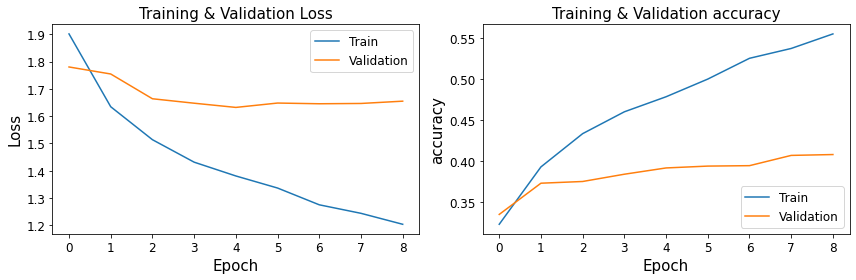

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(mod1_history.history['loss'], label='Train')
plt.plot(mod1_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(mod1_history.history['accuracy'], label='Train')
plt.plot(mod1_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_preds = mod1.predict(X_train_scaled)
val_preds = mod1.predict(X_val_scaled)
pbtest_preds = mod1.predict(X_pbtest_scaled)
print('Shape of train_preds matrix: ', train_preds.shape)
print('Shape of val_preds matrix: ', val_preds.shape)
print('Shape of pbtest_preds matrix: ', pbtest_preds.shape)

Shape of train_preds matrix:  (22967, 7)
Shape of val_preds matrix:  (5742, 7)
Shape of pbtest_preds matrix:  (3589, 7)


In [ ]:
train_preds_labels = np.argmax(train_preds,axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)
pbtest_preds_labels = np.argmax(pbtest_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, train_preds_labels), accuracy_score(y_train_le, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))

Accuracy on train dataset: 0.60047 (60.047%)
Accuracy on validation dataset: 0.40787 (40.787%)
Accuracy on test dataset: 0.40652 (40.652%)


In [ ]:
#calculate per-class classification accuracy

#on train dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_train_le[y_train_le==i]
  pred_label = train_preds_labels[y_train_le==i]
  print('Accuracy of class {} on train dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on train dataset: 0.48105 (48.105%)
Accuracy of class 1 on train dataset: 0.38227 (38.227%)
Accuracy of class 2 on train dataset: 0.48928 (48.928%)
Accuracy of class 3 on train dataset: 0.77960 (77.960%)
Accuracy of class 4 on train dataset: 0.50616 (50.616%)
Accuracy of class 5 on train dataset: 0.56808 (56.808%)
Accuracy of class 6 on train dataset: 0.71908 (71.908%)


In [ ]:
#calculate per-class classification accuracy

#on validation dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_pbtest_le[y_pbtest_le==i]
  pred_label = pbtest_preds_labels[y_pbtest_le==i]
  print('Accuracy of class {} on validation dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on validation dataset: 0.23126 (23.126%)
Accuracy of class 1 on validation dataset: 0.16071 (16.071%)
Accuracy of class 2 on validation dataset: 0.19758 (19.758%)
Accuracy of class 3 on validation dataset: 0.65810 (65.810%)
Accuracy of class 4 on validation dataset: 0.33114 (33.114%)
Accuracy of class 5 on validation dataset: 0.33997 (33.997%)
Accuracy of class 6 on validation dataset: 0.55904 (55.904%)


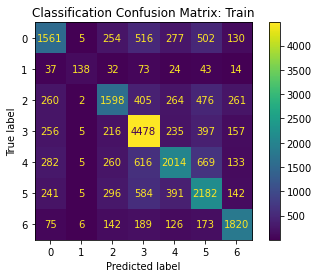

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

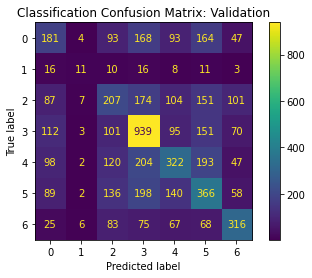

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

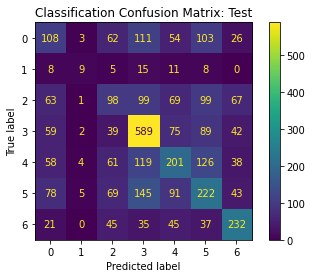

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Test', fontsize=12)
plt.show()

In [ ]:
nn_dict = {'Method':'Neural Network(1HL:100N)',
           'Train': accuracy_score(y_train_le, train_preds_labels),
           'Validation': accuracy_score(y_val_le, val_preds_labels),
           'Test': accuracy_score(y_pbtest_le, pbtest_preds_labels)}

models_comp = pd.DataFrame([nn_dict])
models_comp

,Method,Train,Validation,Test
0,Neural Network(1HL:100N),0.60047,0.407872,0.40652


In [ ]:
# Creating deep neural network model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD

'''initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)'''

ES_callback = EarlyStopping(monitor='val_loss', patience=8, mode='min', min_delta=0.0001)
     
def build_model(n_layers=5, n_neurons=1000):
   model = Sequential()
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'tanh'))
       model.add(BatchNormalization())
       model.add(Dropout(0.2))
   model.add(Dense(7, activation = 'softmax')) 
   return model

In [ ]:
mod2 = build_model(n_layers = 4, n_neurons = 100)
mod2.compile(loss = "categorical_crossentropy", optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
import time
start = time.time()
mod2_history = mod2.fit(X_train_scaled, y_train_c, batch_size=128, 
                          validation_data=(X_val_scaled, y_val_c), epochs = 150, callbacks=[ES_callback])
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/150
180/180 [==============================] - 8s 26ms/step - loss: 2.0105 - accuracy: 0.2405 - val_loss: 1.7053 - val_accuracy: 0.3305
Epoch 2/150
180/180 [==============================] - 3s 14ms/step - loss: 1.7856 - accuracy: 0.3029 - val_loss: 1.6739 - val_accuracy: 0.3356
Epoch 3/150
180/180 [==============================] - 2s 14ms/step - loss: 1.7197 - accuracy: 0.3274 - val_loss: 1.6438 - val_accuracy: 0.3572
Epoch 4/150
180/180 [==============================] - 3s 14ms/step - loss: 1.6798 - accuracy: 0.3391 - val_loss: 1.6404 - val_accuracy: 0.3661
Epoch 5/150
180/180 [==============================] - 2s 13ms/step - loss: 1.6504 - accuracy: 0.3552 - val_loss: 1.6248 - val_accuracy: 0.3669
Epoch 6/150
180/180 [==============================] - 2s 13ms/step - loss: 1.6309 - accuracy: 0.3643 - val_loss: 1.6172 - val_accuracy: 0.3725
Epoch 7/150
180/180 [==============================] - 2s 13ms/step - loss: 1.6109 - accuracy: 0.3705 - val_loss: 1.6094 - val_accuracy:

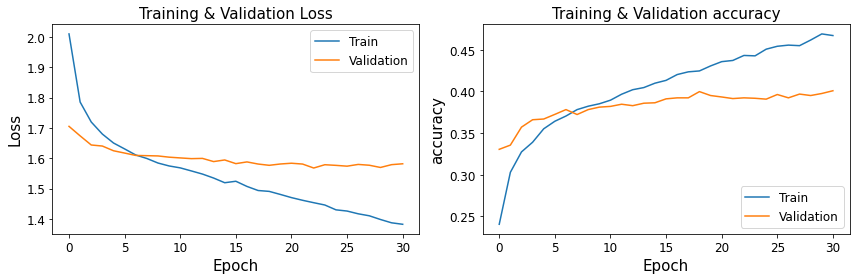

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(mod2_history.history['loss'], label='Train')
plt.plot(mod2_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(mod2_history.history['accuracy'], label='Train')
plt.plot(mod2_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_preds = mod2.predict(X_train_scaled)
val_preds = mod2.predict(X_val_scaled)
pbtest_preds = mod2.predict(X_pbtest_scaled)
print('Shape of train_preds matrix: ', train_preds.shape)
print('Shape of val_preds matrix: ', val_preds.shape)
print('Shape of pbtest_preds matrix: ', pbtest_preds.shape)

Shape of train_preds matrix:  (22967, 7)
Shape of val_preds matrix:  (5742, 7)
Shape of pbtest_preds matrix:  (3589, 7)


In [ ]:
train_preds_labels = np.argmax(train_preds,axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)
pbtest_preds_labels = np.argmax(pbtest_preds, axis=1)

In [ ]:
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, train_preds_labels), accuracy_score(y_train_le, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))

Accuracy on train dataset: 0.53433 (53.433%)
Accuracy on validation dataset: 0.40091 (40.091%)
Accuracy on test dataset: 0.42184 (42.184%)


In [ ]:
#calculate per-class classification accuracy

#on train dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_train_le[y_train_le==i]
  pred_label = train_preds_labels[y_train_le==i]
  print('Accuracy of class {} on train dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on train dataset: 0.41448 (41.448%)
Accuracy of class 1 on train dataset: 0.22715 (22.715%)
Accuracy of class 2 on train dataset: 0.33650 (33.650%)
Accuracy of class 3 on train dataset: 0.78273 (78.273%)
Accuracy of class 4 on train dataset: 0.52325 (52.325%)
Accuracy of class 5 on train dataset: 0.40094 (40.094%)
Accuracy of class 6 on train dataset: 0.64322 (64.322%)


In [ ]:
#calculate per-class classification accuracy

#on validation dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_val_le[y_val_le==i]
  pred_label = val_preds_labels[y_val_le==i]
  print('Accuracy of class {} on validation dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on validation dataset: 0.26267 (26.267%)
Accuracy of class 1 on validation dataset: 0.06667 (6.667%)
Accuracy of class 2 on validation dataset: 0.20457 (20.457%)
Accuracy of class 3 on validation dataset: 0.66417 (66.417%)
Accuracy of class 4 on validation dataset: 0.37120 (37.120%)
Accuracy of class 5 on validation dataset: 0.29323 (29.323%)
Accuracy of class 6 on validation dataset: 0.46406 (46.406%)


In [ ]:
#calculate per-class classification accuracy

#on validation dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_pbtest_le[y_pbtest_le==i]
  pred_label = pbtest_preds_labels[y_pbtest_le==i]
  print('Accuracy of class {} on validation dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on validation dataset: 0.28480 (28.480%)
Accuracy of class 1 on validation dataset: 0.10714 (10.714%)
Accuracy of class 2 on validation dataset: 0.19153 (19.153%)
Accuracy of class 3 on validation dataset: 0.68939 (68.939%)
Accuracy of class 4 on validation dataset: 0.40692 (40.692%)
Accuracy of class 5 on validation dataset: 0.30168 (30.168%)
Accuracy of class 6 on validation dataset: 0.52771 (52.771%)


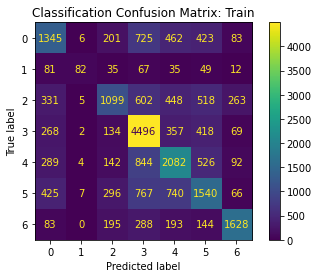

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

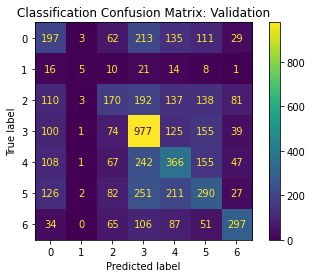

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

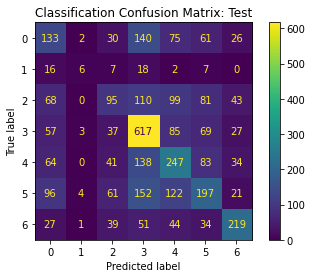

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Test', fontsize=12)
plt.show()

In [ ]:
dnn_dict = {'Method':'Deep Neural Network(4HL:100N)',
           'Train': accuracy_score(y_train_le, train_preds_labels),
           'Validation': accuracy_score(y_val_le, val_preds_labels),
           'Test': accuracy_score(y_pbtest_le, pbtest_preds_labels)}

models_comp = models_comp.append([dnn_dict], ignore_index=True)
models_comp

,Method,Train,Validation,Test
0,Neural Network(1HL:100N),0.600470,0.407872,0.406520
1,Deep Neural Network(4HL:100N),0.534332,0.400906,0.421845


In [ ]:
# Reshaping data for CNN

X_train_scaled_cnn = X_train_scaled.reshape((22967, 48, 48, 1))
X_val_scaled_cnn = X_val_scaled.reshape((5742, 48, 48, 1))
X_pbtest_scaled_cnn = X_pbtest_scaled.reshape((3589, 48, 48, 1))
X_pvtest_scaled_cnn = X_pvtest_scaled.reshape((3589, 48, 48, 1))

print('Shape of X_train: ', X_train_scaled_cnn.shape)
print('Shape of X_val: ', X_val_scaled_cnn.shape)
print('Shape of X_pbtest: ', X_pbtest_scaled_cnn.shape)
print('Shape of X_pvtest: ', X_pvtest_scaled_cnn.shape, '\n')

print('Shape of y_train: ', y_train_c.shape)
print('Shape of y_val: ', y_val_c.shape)
print('Shape of y_pbtest: ', y_pbtest_c.shape)
print('Shape of y_pvtest: ', y_pvtest_c.shape)

Shape of X_train:  (22967, 48, 48, 1)
Shape of X_val:  (5742, 48, 48, 1)
Shape of X_pbtest:  (3589, 48, 48, 1)
Shape of X_pvtest:  (3589, 48, 48, 1) 

Shape of y_train:  (22967, 7)
Shape of y_val:  (5742, 7)
Shape of y_pbtest:  (3589, 7)
Shape of y_pvtest:  (3589, 7)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

mod3 = Sequential() # create Sequential model
mod3.add(Conv2D(32, (3,3), input_shape=(48,48,4), padding='same', activation = 'relu')) 
mod3.add(BatchNormalization())
mod3.add(MaxPooling2D(pool_size=(2,2)))
mod3.add(Dropout(0.2))
mod3.add(Conv2D(64, (3,3), padding='same')) 
mod3.add(BatchNormalization())
mod3.add(MaxPooling2D(pool_size=(2,2)))
mod3.add(Dropout(0.2))
mod3.add(Conv2D(128, (3,3), padding='same')) 
mod3.add(BatchNormalization())
mod3.add(MaxPooling2D(pool_size=(2,2)))
mod3.add(Dropout(0.2))
mod3.add(Flatten())
mod3.add(Dense(7, activation = 'softmax')) 
mod3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
import time
start = time.time()
mod3_history = mod3.fit(X_train_scaled_cnn, y_train_c,
                        validation_data=(X_val_scaled_cnn, y_val_c), 
                        batch_size=64, epochs = 25, callbacks=[ES_callback])
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/25
359/359 [==============================] - 18s 23ms/step - loss: 1.9600 - accuracy: 0.3278 - val_loss: 1.6238 - val_accuracy: 0.3969
Epoch 2/25
359/359 [==============================] - 7s 20ms/step - loss: 1.6118 - accuracy: 0.4175 - val_loss: 1.4705 - val_accuracy: 0.4577
Epoch 3/25
359/359 [==============================] - 7s 19ms/step - loss: 1.4803 - accuracy: 0.4530 - val_loss: 1.5349 - val_accuracy: 0.4457
Epoch 4/25
359/359 [==============================] - 7s 20ms/step - loss: 1.3785 - accuracy: 0.4853 - val_loss: 1.4088 - val_accuracy: 0.4770
Epoch 5/25
359/359 [==============================] - 7s 20ms/step - loss: 1.2986 - accuracy: 0.5159 - val_loss: 1.3573 - val_accuracy: 0.4983
Epoch 6/25
359/359 [==============================] - 7s 19ms/step - loss: 1.2541 - accuracy: 0.5346 - val_loss: 1.3136 - val_accuracy: 0.5101
Epoch 7/25
359/359 [==============================] - 7s 19ms/step - loss: 1.2033 - accuracy: 0.5528 - val_loss: 1.2956 - val_accuracy: 0.520

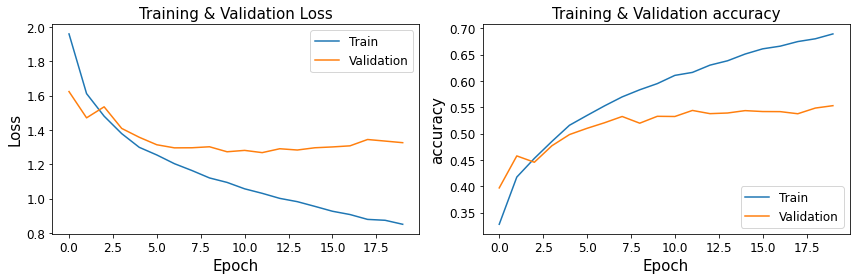

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(mod3_history.history['loss'], label='Train')
plt.plot(mod3_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(mod3_history.history['accuracy'], label='Train')
plt.plot(mod3_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_preds = mod3.predict(X_train_scaled_cnn)
val_preds = mod3.predict(X_val_scaled_cnn)
pbtest_preds = mod3.predict(X_pbtest_scaled_cnn)
print('Shape of train_preds matrix: ', train_preds.shape)
print('Shape of val_preds matrix: ', val_preds.shape)
print('Shape of pbtest_preds matrix: ', pbtest_preds.shape)

Shape of train_preds matrix:  (22967, 7)
Shape of val_preds matrix:  (5742, 7)
Shape of pbtest_preds matrix:  (3589, 7)


In [ ]:
train_preds_labels = np.argmax(train_preds,axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)
pbtest_preds_labels = np.argmax(pbtest_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, train_preds_labels), accuracy_score(y_train_le, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))

Accuracy on train dataset: 0.82166 (82.166%)
Accuracy on validation dataset: 0.55312 (55.312%)
Accuracy on test dataset: 0.53692 (53.692%)


In [ ]:
#calculate per-class classification accuracy

#on train dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_train_le[y_train_le==i]
  pred_label = train_preds_labels[y_train_le==i]
  print('Accuracy of class {} on train dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on train dataset: 0.72881 (72.881%)
Accuracy of class 1 on train dataset: 0.91967 (91.967%)
Accuracy of class 2 on train dataset: 0.74158 (74.158%)
Accuracy of class 3 on train dataset: 0.91957 (91.957%)
Accuracy of class 4 on train dataset: 0.80548 (80.548%)
Accuracy of class 5 on train dataset: 0.78365 (78.365%)
Accuracy of class 6 on train dataset: 0.89095 (89.095%)


In [ ]:
#calculate per-class classification accuracy

#on validation dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_val_le[y_val_le==i]
  pred_label = val_preds_labels[y_val_le==i]
  print('Accuracy of class {} on validation dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on validation dataset: 0.37600 (37.600%)
Accuracy of class 1 on validation dataset: 0.48000 (48.000%)
Accuracy of class 2 on validation dataset: 0.36943 (36.943%)
Accuracy of class 3 on validation dataset: 0.77634 (77.634%)
Accuracy of class 4 on validation dataset: 0.54665 (54.665%)
Accuracy of class 5 on validation dataset: 0.43984 (43.984%)
Accuracy of class 6 on validation dataset: 0.67969 (67.969%)


In [ ]:
#calculate per-class classification accuracy

#on test dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_pbtest_le[y_pbtest_le==i]
  pred_label = pbtest_preds_labels[y_pbtest_le==i]
  print('Accuracy of class {} on test dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on test dataset: 0.40257 (40.257%)
Accuracy of class 1 on test dataset: 0.46429 (46.429%)
Accuracy of class 2 on test dataset: 0.34677 (34.677%)
Accuracy of class 3 on test dataset: 0.76089 (76.089%)
Accuracy of class 4 on test dataset: 0.48929 (48.929%)
Accuracy of class 5 on test dataset: 0.40888 (40.888%)
Accuracy of class 6 on test dataset: 0.71325 (71.325%)


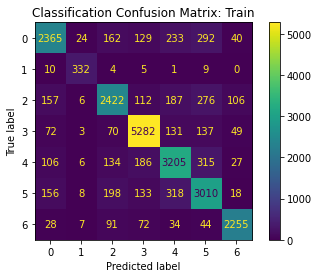

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

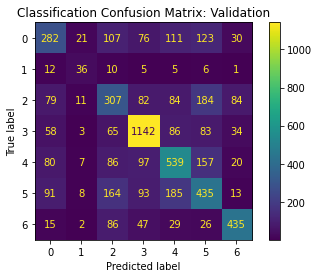

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

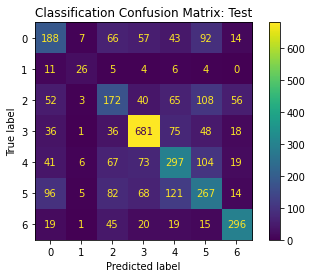

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Test', fontsize=12)
plt.show()

In [ ]:
cnn_dict = {'Method':'Convolutional Neural Network',
           'Train': accuracy_score(y_train_le, train_preds_labels),
           'Validation': accuracy_score(y_val_le, val_preds_labels),
           'Test': accuracy_score(y_pbtest_le, pbtest_preds_labels)}

models_comp = models_comp.append([cnn_dict], ignore_index=True)
models_comp

,Method,Train,Validation,Test
0,Neural Network(1HL:100N),0.600470,0.407872,0.406520
1,Deep Neural Network(4HL:100N),0.534332,0.400906,0.421845
2,Convolutional Neural Network,0.821657,0.553117,0.536918


In [ ]:
mod1.save('NN on Final Project_mod1.h5')
mod2.save('NN on Final Project_mod2.h5')
mod3.save('NN on Final Project_mod3.h5')

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

# fer2013 = pd.read_csv('/content/drive/MyDrive/Data/fer2013.csv', header=None, delim_whitespace=True)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Data/
%ls

/content/drive/MyDrive/Data
ecoli.data   fer2013.bib             final_practice.csv                   RNN/
ecoli.names  fer2013.csv             haarcascade_frontalface_default.xml
exp.jpg      FER_PAPERS_SUMMARY.txt  handsome_man.jpg


#course demo version

##**Step 1: Download image data**
(fer2013.tar.gz)** from: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Step 2: Load data into python (FIRST TIME ONLY) using the following codes :**

In [ ]:
def load_fer2013(path='/content/drive/MyDrive/Data/fer2013.csv'):
    import pandas as pd
    fer_data = pd.read_csv(path)
    fer_data['emotion_type'] = fer_data['emotion']
    fer_data = fer_data.replace(0, 'Angry')
    fer_data = fer_data.replace(1, 'Disgust')
    fer_data = fer_data.replace(2, 'Fear')
    fer_data = fer_data.replace(3, 'Happy')
    fer_data = fer_data.replace(4, 'Sad')
    fer_data = fer_data.replace(5, 'Surprise')
    fer_data = fer_data.replace(6, 'Neutral')
    fer_data = fer_data.drop('emotion', axis = 1)
    train_data = fer_data[fer_data['Usage']=='Training'].reset_index(drop=True)
    publictest_data = fer_data[fer_data['Usage']=='PublicTest'].reset_index(drop=True)
    privatetest_data = fer_data[fer_data['Usage']=='PrivateTest'].reset_index(drop=True)
    
    return train_data, publictest_data, privatetest_data

train_data, publictest_data, privatetest_data = load_fer2013()


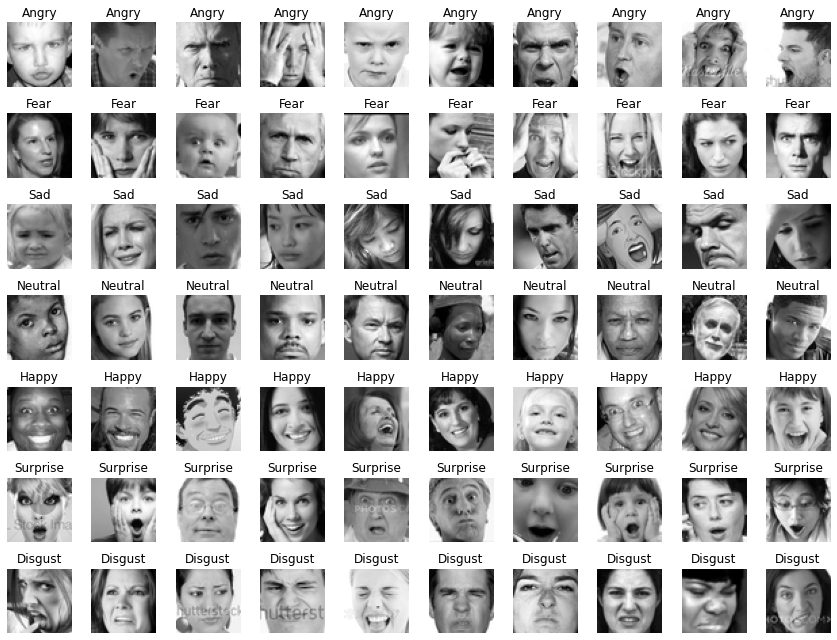

In [ ]:
def plot_faces(data, images_per_row=10, size = 48):
    import matplotlib.pyplot as plt
    import numpy as np
    # set figure size
    plt.figure(figsize=(12,9))
    n_rows = len(data['emotion_type'].unique())
    
    loc = 0
    for category in data['emotion_type'].unique():
        # sample K images for each category
        images = data[data['emotion_type']==category].sample(images_per_row)
        
        for i in range(images_per_row):
            some_pixel = np.array(images.iloc[i]['pixels'].split()).astype('float32') # select one image sample
            some_image = some_pixel.reshape(size, size) # reshape from rank-1 tensor (2304,) to rank-2 tensor (48,48) 
            
            # put image in subplots
            loc += 1
            ax = plt.subplot(n_rows, images_per_row, loc)
            
            ax.imshow(some_image, cmap='gray')
            ax.axis("off")
            ax.set_title(images.iloc[i]['emotion_type'])
        plt.tight_layout()
    plt.axis("off")

plot_faces(train_data, images_per_row=10, size = 48)

## **Split data into different sets**

In [ ]:
inhouse_train_data =train_data.sample(frac=0.8,random_state=42) 
inhouse_val_data=train_data.drop(inhouse_train_data.index)

# reset the index
inhouse_train_data = inhouse_train_data.reset_index(drop=True)
inhouse_val_data = inhouse_val_data.reset_index(drop=True)

In [ ]:
#### loading libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

#### (1) processing in-house training dataset
inhouse_train_features=inhouse_train_data.pixels.str.split(expand=True)
inhouse_train_labels = encoder.fit_transform(inhouse_train_data['emotion_type'])

#### (2) processing in-house validation dataset
inhouse_valid_features=inhouse_val_data.pixels.str.split(expand=True)
inhouse_valid_labels = encoder.fit_transform(inhouse_val_data['emotion_type'])

#### (3) processing public-test dataset
publictest_features=publictest_data.pixels.str.split(expand=True)
publictest_labels = encoder.fit_transform(publictest_data['emotion_type'])

#### (4) processing private-test dataset
privatetest_features=privatetest_data.pixels.str.split(expand=True)
privatetest_labels = encoder.fit_transform(privatetest_data['emotion_type'])

In [ ]:
import numpy as np
np.save("inhouse_train_features", inhouse_train_features.to_numpy())
np.save("inhouse_train_labels", inhouse_train_labels)
np.save("inhouse_valid_features", inhouse_valid_features.to_numpy())
np.save("inhouse_valid_labels", inhouse_valid_labels)
np.save("privatetest_features", privatetest_features.to_numpy())
np.save("privatetest_labels", privatetest_labels)
np.save("publictest_features", publictest_features.to_numpy())
np.save("publictest_labels", publictest_labels)

### Load data from disk

In [ ]:
import numpy as np
inhouse_train_features = np.load("/content/drive/MyDrive/Data/inhouse_train_features.npy", allow_pickle=True)
inhouse_train_labels = np.load("/content/drive/MyDrive/Data/inhouse_train_labels.npy", allow_pickle=True)
inhouse_valid_features = np.load("/content/drive/MyDrive/Data/inhouse_valid_features.npy", allow_pickle=True)
inhouse_valid_labels = np.load("/content/drive/MyDrive/Data/inhouse_valid_labels.npy", allow_pickle=True)
publictest_labels = np.load("/content/drive/MyDrive/Data/publictest_labels.npy", allow_pickle=True)
publictest_features = np.load("/content/drive/MyDrive/Data/publictest_features.npy", allow_pickle=True)
privatetest_features = np.load("/content/drive/MyDrive/Data/privatetest_features.npy", allow_pickle=True)
privatetest_labels = np.load("/content/drive/MyDrive/Data/privatetest_labels.npy", allow_pickle=True)

## **Preprocessing**

### Scaling

In [ ]:
# Normalization for neural network, DNN, and CNN

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inhouse_valid_features)
X_train_scaled = scaler.transform(inhouse_train_features)
X_val_scaled = scaler.transform(inhouse_valid_features)

In [ ]:
X_train_scaled_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], 48,48, 1)
X_val_scaled_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], 48,48, 1)

### One-Hot Encoding

In [ ]:
#converting labels from numerical to dummy

from tensorflow.keras.utils import to_categorical
import numpy as np
y_train_c = to_categorical(inhouse_train_labels, 7)
y_val_c = to_categorical(inhouse_valid_labels, 7)
print('Categorical Train Labels Matrix: ', y_train_c.shape)
print('Categorical Validation Labels Matrix: ', y_val_c.shape)

Categorical Train Labels Matrix:  (22967, 7)
Categorical Validation Labels Matrix:  (5742, 7)


### Data augmentation

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=10,
                                         width_shift_range=0.05,
                                         height_shift_range=0.05,
                                         horizontal_flip=True,
                                         shear_range=0.2,
                                         zoom_range=0.2).flow(X_train_scaled_cnn, y_train_c, batch_size=32)

In [ ]:
valid_generator = ImageDataGenerator().flow(X_val_scaled_cnn, y_val_c, batch_size=32)

## CNN MODEL
with augmented data

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import PReLU
mod3 = Sequential() # create Sequential model
mod3.add(Conv2D(32, (1,1), input_shape=(48,48,1), padding='same', activation = 'relu')) 
# block 1
mod3.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
mod3.add(PReLU())
mod3.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
mod3.add(PReLU())
mod3.add(MaxPooling2D(pool_size=(2,2), strides=2))
# block 2 
mod3.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
mod3.add(PReLU())
mod3.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
mod3.add(PReLU())
mod3.add(MaxPooling2D(pool_size=(2,2), strides=2))

# fc
mod3.add(Flatten())
mod3.add(Dense(2048, activation = 'relu')) 
mod3.add(Dropout(0.2))
mod3.add(Dense(1024, activation = 'relu')) 
mod3.add(Dropout(0.5))
mod3.add(Dense(7, activation = 'softmax')) 
mod3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
mod3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import time
start = time.time()
mod3_history = mod3.fit_generator(train_generator,
                                          steps_per_epoch=len(y_train_c) // 32,
                                          epochs=50,
                                          validation_data=valid_generator,
                                          validation_steps=len(y_val_c) // 32,
                                          callbacks=callback)
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


717/717 [==============================] - ETA: 0s - loss: 1.7232 - accuracy: 0.2992
Epoch 1: val_loss improved from inf to 1.56589, saving model to ./best_weights.h5
717/717 [==============================] - 49s 67ms/step - loss: 1.7232 - accuracy: 0.2992 - val_loss: 1.5659 - val_accuracy: 0.4010
Epoch 2/50
717/717 [==============================] - ETA: 0s - loss: 1.5803 - accuracy: 0.3817
Epoch 2: val_loss improved from 1.56589 to 1.41643, saving model to ./best_weights.h5
717/717 [==============================] - 49s 68ms/step - loss: 1.5803 - accuracy: 0.3817 - val_loss: 1.4164 - val_accuracy: 0.4586
Epoch 3/50
717/717 [==============================] - ETA: 0s - loss: 1.4483 - accuracy: 0.4385
Epoch 3: val_loss improved from 1.41643 to 1.32090, saving model to ./best_weights.h5
717/717 [==============================] - 49s 68ms/step - loss: 1.4483 - accuracy: 0.4385 - val_loss: 1.3209 - val_accuracy: 0.4939
Epoch 4/50
717/717 [==============================] - ETA: 0s - loss: 

## Gabor filtering

In [ ]:
#### Gabor filtering

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# x = inhouse_train_features.iloc[1].values.astype(float).reshape(48,48)
# res = extract_gabor_features(x)
# res.shape

In [ ]:
from skimage.filters import gabor_kernel, gabor
import numpy as np

def extract_gabor_features(image, pca_component = 20):
    res = []
    for freq in [0.25]:
      for theta in [np.pi/4,np.pi/2,np.pi*3/4,np.pi]:
        for bandwidth in [1]:
          coeff_real, _ = gabor(image, frequency=freq, theta=theta,bandwidth=bandwidth)
          #res.append(coeff_real.flatten())
          res.append(coeff_real)
    res = np.array(res)
    return res

x1 = inhouse_train_features.iloc[0].values.astype(float).reshape(48,48)
res1 = extract_gabor_features(x1)

res1.shape

(4, 48, 48)

In [ ]:
from skimage.filters import gabor_kernel, gabor
import numpy as np

def extract_gabor_features_list(images, pca_component = 20):
    res = []
    for image in images:
      image_features = [] 
      image = image.astype(int).reshape(48,48)
      for freq in [0.25]:
        for theta in [np.pi/4,np.pi/2,np.pi*3/4,np.pi]:
          for bandwidth in [1]:
            coeff_real, _ = gabor(image, frequency=freq, theta=theta,bandwidth=bandwidth)
            #res.append(coeff_real.flatten())
            image_features.append(coeff_real)
      res.append(image_features)
    res = np.array(res)
    return res

### Extract features (run one time only)

In [ ]:
inhouse_valid_features.to_numpy()

In [ ]:
# inhouse_train_features.shape
X_features_extracted = extract_gabor_features_list(inhouse_train_features[0:15000].to_numpy())
X_features_extracted_val = extract_gabor_features_list(inhouse_valid_features.to_numpy())

In [ ]:
print(X_features_extracted.shape,len(inhouse_train_labels))

(15000, 4, 48, 48) 22967


In [ ]:
np.save("/content/drive/MyDrive/Data/X_features_extracted", X_features_extracted)
np.save("/content/drive/MyDrive/Data/X_features_extracted_val", X_features_extracted_val)

### Load saved inhouse_train/valid_features on runs after the first

In [ ]:
inhouse_train_features = np.load("/content/drive/MyDrive/Data/inhouse_train_features.npy", allow_pickle=True)
inhouse_valid_features = np.load("/content/drive/MyDrive/Data/inhouse_valid_features.npy", allow_pickle=True)


In [ ]:
inhouse_train_labels = np.load("/content/drive/MyDrive/Data/inhouse_train_labels.npy", allow_pickle=True)
inhouse_valid_labels = np.load("/content/drive/MyDrive/Data/inhouse_valid_labels.npy", allow_pickle=True)

#converting labels from numerical to dummy

from tensorflow.keras.utils import to_categorical
import numpy as np
y_train_c = to_categorical(inhouse_train_labels, 7)
y_val_c = to_categorical(inhouse_valid_labels, 7)
print('Categorical Train Labels Matrix: ', y_train_c.shape)
print('Categorical Validation Labels Matrix: ', y_val_c.shape)
# y_val_c[0]

Categorical Train Labels Matrix:  (22967, 7)
Categorical Validation Labels Matrix:  (5742, 7)


### Load saved extracted_features on runs after the first

In [ ]:
# X_features_extracted

X_features_extracted = np.load("/content/drive/MyDrive/Data/X_features_extracted.npy", allow_pickle=True)
X_features_extracted_val = np.load("/content/drive/MyDrive/Data/X_features_extracted_val.npy", allow_pickle=True)
X_features_extracted.shape

(15000, 4, 48, 48)

In [ ]:
X_features_extracted_reshape = np.transpose(X_features_extracted, (0,2,3, 1))
X_features_extracted_val_reshape = np.transpose(X_features_extracted_val, (0,2,3, 1))
print(X_features_extracted_reshape.shape,X_features_extracted_val_reshape.shape)

np.save("/content/drive/MyDrive/Data/X_features_extracted_reshape", X_features_extracted_reshape)
np.save("/content/drive/MyDrive/Data/X_features_extracted_val_reshape", X_features_extracted_val_reshape)


(15000, 48, 48, 4) (5742, 48, 48, 4)


In [ ]:
X_features_extracted_reshape = np.load("/content/drive/MyDrive/Data/X_features_extracted_reshape.npy", allow_pickle=True)
X_features_extracted_val_reshape = np.load("/content/drive/MyDrive/Data/X_features_extracted_val_reshape.npy", allow_pickle=True)

### CNN With Gabor Extracted Feature Images

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

mod4 = Sequential() # create Sequential model
mod4.add(Conv2D(32, (3,3), input_shape=(48,48,4), padding='same', activation = 'relu')) 
mod4.add(BatchNormalization())
mod4.add(MaxPooling2D(pool_size=(2,2)))
mod4.add(Dropout(0.2))
mod4.add(Conv2D(64, (3,3), padding='same')) 
mod4.add(BatchNormalization())
mod4.add(MaxPooling2D(pool_size=(2,2)))
mod4.add(Dropout(0.2))
mod4.add(Conv2D(128, (3,3), padding='same')) 
mod4.add(BatchNormalization())
mod4.add(MaxPooling2D(pool_size=(2,2)))
mod4.add(Dropout(0.2))
mod4.add(Flatten())
mod4.add(Dense(7, activation = 'softmax')) 
mod4.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
mod4.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
import time
start = time.time()
mod4.fit(X_features_extracted_reshape, y_train_c[0:15000],
          batch_size=128, epochs=30, verbose=1,
          validation_data=(X_features_extracted_val_reshape, y_val_c))
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/30
118/118 [==============================] - 3s 25ms/step - loss: 1.7055 - accuracy: 0.3553 - val_loss: 1.6115 - val_accuracy: 0.3807
Epoch 2/30
118/118 [==============================] - 3s 24ms/step - loss: 1.6487 - accuracy: 0.3814 - val_loss: 1.6285 - val_accuracy: 0.3997
Epoch 3/30
118/118 [==============================] - 3s 22ms/step - loss: 1.6081 - accuracy: 0.3859 - val_loss: 1.5848 - val_accuracy: 0.3906
Epoch 4/30
118/118 [==============================] - 3s 22ms/step - loss: 1.5646 - accuracy: 0.4053 - val_loss: 1.5322 - val_accuracy: 0.4288
Epoch 5/30
118/118 [==============================] - 3s 22ms/step - loss: 1.5263 - accuracy: 0.4184 - val_loss: 1.5083 - val_accuracy: 0.4262
Epoch 6/30
118/118 [==============================] - 3s 22ms/step - loss: 1.4856 - accuracy: 0.4369 - val_loss: 1.5003 - val_accuracy: 0.4258
Epoch 7/30
118/118 [==============================] - 3s 22ms/step - loss: 1.4760 - accuracy: 0.4361 - val_loss: 1.4904 - val_accuracy: 0.4371

### Deeper network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import PReLU
from keras.layers.core import Dense, Activation

model = Sequential()
### Input block
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

### block2
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

### block3
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

### block4
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

### Flatten to Dense Layer
model.add(Flatten())

### Dense Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [
        EarlyStopping(monitor='val_loss', patience=20, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_accuracy', verbose=True, save_best_only=True,
                        save_weights_only=True)]
                        
train_history = model.fit(X_features_extracted_reshape, y_train_c[0:15000],
          batch_size=128, epochs=50, verbose=1,
          validation_data=(X_features_extracted_val_reshape, y_val_c))

                
                # model.fit_generator(train_datagenerator,
                #                           steps_per_epoch=len(y_train_categorical) // 64,
                #                           epochs=100,
                #                           validation_data=valid_datagenerator,
                #                           validation_steps=len(y_valid_categorical) // 64,
                #                           callbacks=callback)

Epoch 1/50
118/118 [==============================] - 12s 66ms/step - loss: 1.8834 - accuracy: 0.2706 - val_loss: 1.8230 - val_accuracy: 0.3149
Epoch 2/50
118/118 [==============================] - 7s 56ms/step - loss: 1.5932 - accuracy: 0.3899 - val_loss: 1.5893 - val_accuracy: 0.3859
Epoch 3/50
118/118 [==============================] - 7s 56ms/step - loss: 1.4451 - accuracy: 0.4470 - val_loss: 1.5256 - val_accuracy: 0.4371
Epoch 4/50
118/118 [==============================] - 7s 56ms/step - loss: 1.3423 - accuracy: 0.4869 - val_loss: 1.2957 - val_accuracy: 0.5098
Epoch 5/50
118/118 [==============================] - 7s 57ms/step - loss: 1.2568 - accuracy: 0.5229 - val_loss: 1.5181 - val_accuracy: 0.4556
Epoch 6/50
118/118 [==============================] - 7s 59ms/step - loss: 1.1983 - accuracy: 0.5413 - val_loss: 1.3539 - val_accuracy: 0.4908
Epoch 7/50
118/118 [==============================] - 7s 58ms/step - loss: 1.1358 - accuracy: 0.5684 - val_loss: 1.3025 - val_accuracy: 0.520

### Concatenate extracted features with original images

In [ ]:
# inhouse_reshape_train = np.reshape(inhouse_train_features, (len(inhouse_train_features), 48,48 ,1))
# inhouse_reshape_val = np.reshape(inhouse_valid_features, (len(inhouse_valid_features), 48,48 ,1))

train_original_images_reshaped = np.reshape(inhouse_train_features, (len(inhouse_train_features), 48,48 ,1))[0:15000]
val_original_images_reshaped = np.reshape(inhouse_valid_features, (len(inhouse_valid_features), 48,48 ,1))

np.save("/content/drive/MyDrive/Data/train_original_images_reshaped", train_original_images_reshaped)
np.save("/content/drive/MyDrive/Data/val_original_images_reshaped", val_original_images_reshaped)



In [ ]:
# NO LONGER NEED TO LOAD: inhouse_train_features
train_original_images_reshaped = np.load("/content/drive/MyDrive/Data/train_original_images_reshaped.npy",allow_pickle=True)
val_original_images_reshaped = np.load("/content/drive/MyDrive/Data/val_original_images_reshaped.npy",allow_pickle=True)


In [ ]:
# np.concatenate()
X_features_extracted_reshape_conc = np.concatenate([X_features_extracted_reshape,train_original_images_reshaped ], axis = 3)
np.save("/content/drive/MyDrive/Data/X_features_extracted_reshape_conc", X_features_extracted_reshape_conc)


In [ ]:
X_features_extracted_val_reshape_conc = np.concatenate([X_features_extracted_val_reshape, val_original_images_reshaped], axis = 3)
np.save("/content/drive/MyDrive/Data/X_features_extracted_val_reshape_conc", X_features_extracted_val_reshape_conc)

In [ ]:
X_features_extracted_reshape_conc = np.load("/content/drive/MyDrive/Data/X_features_extracted_reshape_conc.npy",allow_pickle=True)
X_features_extracted_val_reshape_conc = np.load("/content/drive/MyDrive/Data/X_features_extracted_val_reshape_conc.npy",allow_pickle=True)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import PReLU
from keras.layers.core import Dense, Activation

model1 = Sequential()
### Input block
model1.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,4)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model1.add(Dropout(0.25))

### block2
model1.add(Conv2D(128, (5, 5), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model1.add(Dropout(0.25))

### block3
model1.add(Conv2D(512, (3, 3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model1.add(Dropout(0.25))

### block4
model1.add(Conv2D(512, (3, 3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model1.add(Dropout(0.25))

### Flatten to Dense Layer
model1.add(Flatten())

### Dense Layer
model1.add(Dense(256))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

model1.add(Dense(512))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

model1.add(Dense(7))
model1.add(Activation('softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
model1.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [
        EarlyStopping(monitor='val_loss', patience=20, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_accuracy', verbose=True, save_best_only=True,
                        save_weights_only=True)]
                        
train_history = model1.fit(X_features_extracted_reshape_conc, y_train_c[0:15000],
          batch_size=128, 
          epochs=50, 
          verbose=1,
          validation_data=(X_features_extracted_val_reshape_conc, 
                           y_val_c)
          )

                
                # model.fit_generator(train_datagenerator,
                #                           steps_per_epoch=len(y_train_categorical) // 64,
                #                           epochs=100,
                #                           validation_data=valid_datagenerator,
                #                           validation_steps=len(y_valid_categorical) // 64,
                #                           callbacks=callback)

ValueError: ignored

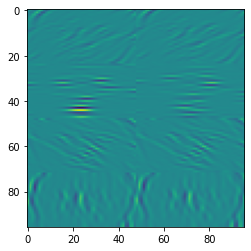

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1); 
plt.clf(); 
plt.imshow(res_1_reshaped)
# type(res1)

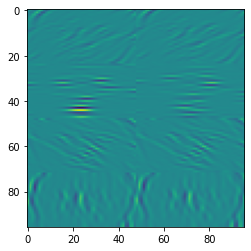

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1); plt.clf(); plt.imshow(res_1_reshaped)

In [ ]:
inhouse_train_data

,pixels,Usage,emotion_type
0,138 147 144 142 138 141 124 41 34 41 55 61 65 ...,Training,Neutral
1,17 20 25 30 33 36 41 42 43 46 46 48 50 51 51 4...,Training,Sad
2,109 97 125 135 148 168 149 149 180 186 188 160...,Training,Neutral
3,165 69 58 62 64 66 50 43 44 43 47 49 50 41 39 ...,Training,Fear
4,85 86 85 85 85 84 85 85 85 85 84 90 55 74 102 ...,Training,Angry
...,...,...,...
22962,40 47 42 52 52 49 50 48 41 43 42 40 34 32 33 3...,Training,Happy
22963,13 16 14 12 10 9 8 9 12 14 20 19 19 20 25 29 3...,Training,Angry
22964,10 26 64 82 94 104 118 125 129 136 133 133 135...,Training,Happy
22965,104 104 87 107 149 165 174 179 179 177 178 179...,Training,Fear


In [ ]:
res.shape

(4, 48, 48)

# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  # Let M = 2
res_1_reshaped = np.reshape(res1,[96,96])
pca.fit(res_1_reshaped)

PCA(n_components=2)

In [ ]:
print(pca.components_.shape)

(2, 96)


In [ ]:
Reduced_res1_train = pca.transform(res_1_reshaped)
Reduced_res1_train.shape 

(96, 2)

In [ ]:
pca = PCA(n_components=0.999)
res1_reduced = pca.fit_transform(res_1_reshaped)

In [ ]:
print('Minimum number of PCs:', pca.n_components_)
print('Cumulative variance ratio: ',np.sum(pca.explained_variance_ratio_))

Minimum number of PCs: 50
Cumulative variance ratio:  0.9991151193244042


In [ ]:
res1_reduced

array([[ -0.69541993,   1.34927715,   1.03290918, ...,  -0.37492655,
         -0.06431457,  -0.05993097],
       [  0.54663149,   6.99158926,   0.87836869, ...,   0.04992197,
          0.05150133,   0.05635954],
       [  0.19437668,  -3.93307606,  -1.00575284, ...,  -0.61346765,
         -0.01490091,  -0.25162166],
       ...,
       [  0.04298271,  -7.87534757,  -1.17276864, ...,  -0.04583036,
          0.36137038,  -0.43150848],
       [  0.02180462,  -9.24550292,  -1.35297339, ...,  -0.1117727 ,
          0.11968385,  -0.091359  ],
       [  0.24692594, -10.11915859,  -1.7315063 , ...,   0.08385127,
         -0.27808731,   0.33856465]])